# Team 4 Data Analysis

In [1]:
import pandas as pd

df = pd.read_csv("msamd_14454.csv")
df.head()

/var/folders/pl/0qrs2c_56bd6q9jwb600j60h0000gn/T/ipykernel_12559/4104424442.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


## By county determine how many loans were taken.

A loan being taken has a value of 1 in the 'action_taken' column

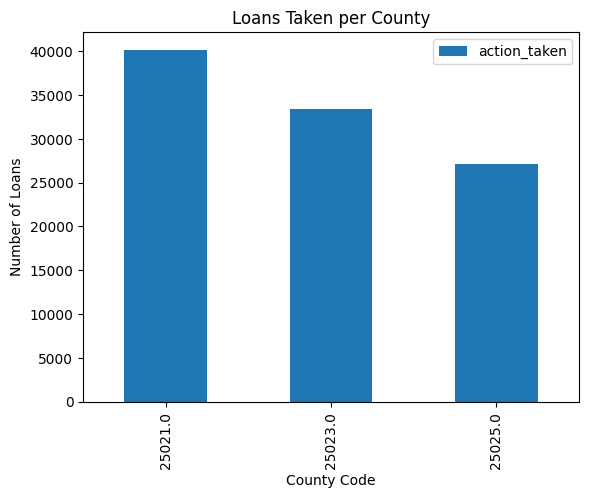

In [2]:
import matplotlib.pyplot as plt

df3 = df[['county_code', 'action_taken']]
df3['action_taken'].map({1: 1, 2: 0}).fillna(0)
df3 = df3.query('action_taken == 1')
df3.groupby('county_code').count().plot(kind='bar')
plt.title('Loans Taken per County')
plt.xlabel('County Code')
plt.ylabel('Number of Loans')
plt.show()

In [3]:
county_codes_dict = {25021: 'Norfolk', 25023: 'Plymouth', 25025: 'Suffolk'}
per_county_count = df3['county_code'].value_counts()

for county_code in county_codes_dict.keys():
    print(f"{county_codes_dict[county_code]}: {per_county_count[county_code]}")

Norfolk: 40175
Plymouth: 33453
Suffolk: 27140


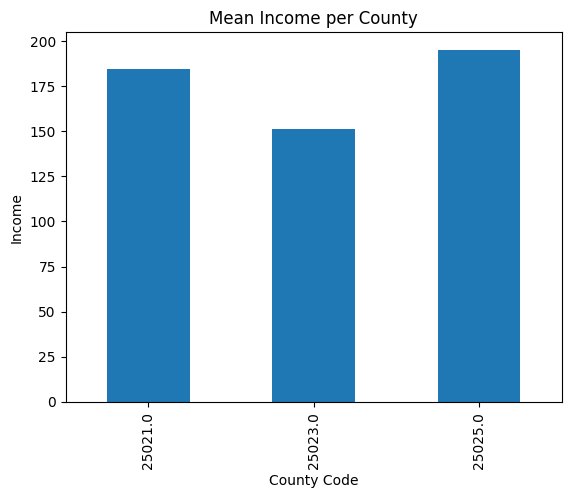

In [4]:
counties = df.groupby('county_code')['income'].mean()
counties.plot(kind='bar')
plt.title('Mean Income per County')
plt.xlabel('County Code')
plt.ylabel('Income')
plt.show()

## Establish who is participating in first time home ownership programs

In [5]:
df2 = df[['applicant_age', 'derived_dwelling_category', 'derived_race', 'income']]
df2 = df2.loc[((df['applicant_age'] == '25-34') | 
               (df['applicant_age'] == '<25')) & ((df['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built') | 
                (df['derived_dwelling_category'] == 'Single Family (1-4 Units):Manufactured'))]
df2.head(20)

,applicant_age,derived_dwelling_category,derived_race,income
3,25-34,Single Family (1-4 Units):Site-Built,Black or African American,104.0
4,25-34,Single Family (1-4 Units):Site-Built,Race Not Available,86.0
12,25-34,Single Family (1-4 Units):Site-Built,Black or African American,49.0
15,25-34,Single Family (1-4 Units):Site-Built,Black or African American,131.0
16,25-34,Single Family (1-4 Units):Site-Built,Black or African American,NaN
26,25-34,Single Family (1-4 Units):Site-Built,White,174.0
33,25-34,Single Family (1-4 Units):Site-Built,White,110.0
34,25-34,Single Family (1-4 Units):Site-Built,Black or African American,177.0
37,25-34,Single Family (1-4 Units):Site-Built,White,75.0
40,25-34,Single Family (1-4 Units):Site-Built,Black or African American,88.0


In [6]:
import matplotlib.pyplot as plt
# Drop rows with missing income
df2 = df2.dropna(subset=['income'])
df2 = df2.drop(df2[df2['income'] < 0].index)
#print(df2.isnull().sum())

### Distribution of different races

derived_race
2 or more minority races                        39
American Indian or Alaska Native                37
Asian                                         3023
Black or African American                     1654
Joint                                          681
Native Hawaiian or Other Pacific Islander       26
Race Not Available                            4340
White                                        16332
Name: derived_race, dtype: int64


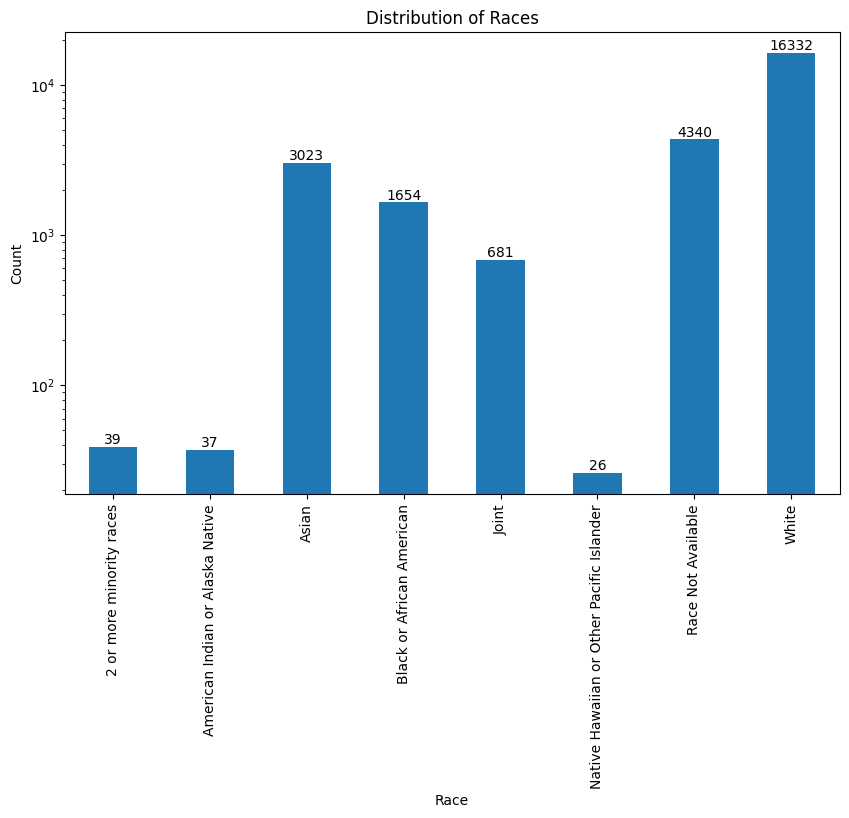

In [7]:
race = df2.groupby('derived_race')['derived_race'].count()
print(race)
plt.figure(figsize=(10, 6))
race.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races')

plt.yscale('log')

for i, v in enumerate(race):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

### The distribution of income for different derived race.

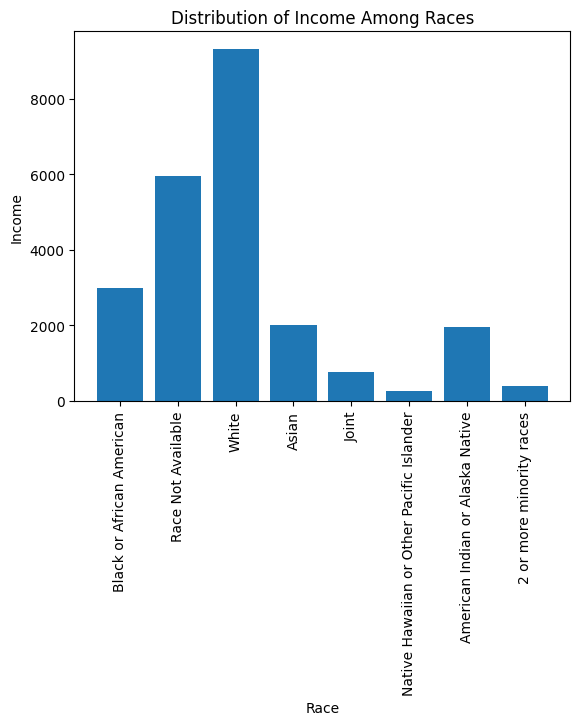

In [8]:
plt.bar(df2['derived_race'], df2['income'])
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Income')
plt.title('Distribution of Income Among Races')
plt.show()



## Rafael

### The distribution for applicants' age and income. 

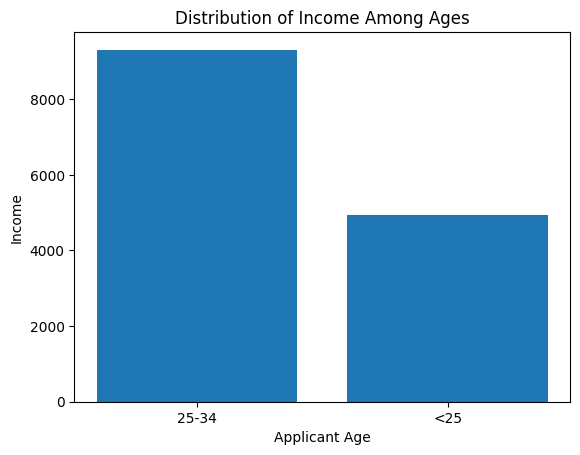

In [9]:
plt.bar(df2['applicant_age'], df2['income'])
plt.xlabel('Applicant Age')
plt.ylabel('Income')
plt.title('Distribution of Income Among Ages')
plt.show()



## Rafael

## Average Income by Housing Type: Accepted

In [10]:
new_df=df.groupby('derived_dwelling_category')

In [11]:
df['denial_reason-1'].unique()

array([  10,    9,    3,    1,    4,    2,    5,    7,    6, 1111,    8])

In [12]:
accepted = df.loc[df['denial_reason-1']==10]

In [13]:
rejected = df.loc[df['denial_reason-1']!=10]

In [14]:
accepted = accepted.groupby('derived_dwelling_category')['income'].mean()
accepted.head()

derived_dwelling_category
Multifamily:Manufactured                         NaN
Multifamily:Site-Built                    380.750000
Single Family (1-4 Units):Manufactured     69.204651
Single Family (1-4 Units):Site-Built      179.682410
Name: income, dtype: float64

In [15]:
dwelling_counts = df['derived_dwelling_category'].value_counts().reset_index()
dwelling_counts.columns = ['Dwelling_Category', 'Count']

total_with_dwelling = dwelling_counts['Count'].sum()
dwelling_counts['Percentage'] = (dwelling_counts['Count'] / total_with_dwelling) * 100

dwelling_percentage_dict = dwelling_counts.set_index('Dwelling_Category')['Percentage'].to_dict()
df['Dwelling_Percentage'] = df['derived_dwelling_category'].map(dwelling_percentage_dict)

df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,Dwelling_Percentage
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4448,31.27,113700,91,1016,1519,72,99.368581
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4230,7.78,113700,179,1228,1394,60,99.368581
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,7312,2.95,113700,132,2099,2345,43,99.368581
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,2380,77.98,113700,18,16,343,51,99.368581
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,5399,69.98,113700,54,568,1437,48,99.368581


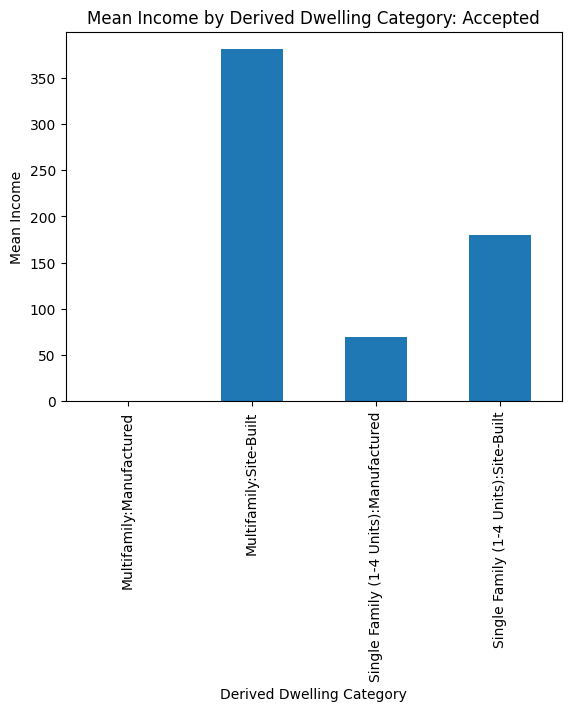

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
accepted.plot(kind='bar')
plt.xlabel('Derived Dwelling Category')
plt.ylabel('Mean Income')
plt.title('Mean Income by Derived Dwelling Category: Accepted')
plt.show()


## David

/var/folders/pl/0qrs2c_56bd6q9jwb600j60h0000gn/T/ipykernel_12559/3988151980.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


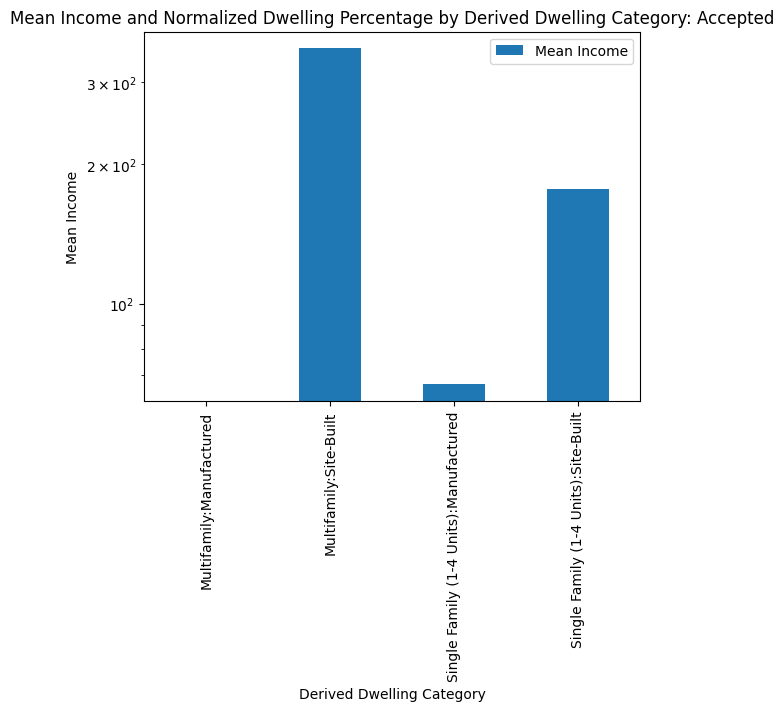

In [17]:
df = pd.read_csv("msamd_14454.csv")

# Calculate the mean income for each dwelling category
mean_income_by_category = df.groupby('derived_dwelling_category')['income'].mean().reset_index()

# Normalize the dwelling distribution and create the dictionary as done previously
dwelling_counts = df['derived_dwelling_category'].value_counts().reset_index()
dwelling_counts.columns = ['Dwelling_Category', 'Count']
total_with_dwelling = dwelling_counts['Count'].sum()
dwelling_counts['Percentage'] = (dwelling_counts['Count'] / total_with_dwelling) * 100
dwelling_percentage_dict = dwelling_counts.set_index('Dwelling_Category')['Percentage'].to_dict()

# Merge the mean income DataFrame with the normalized dwelling percentages
mean_income_by_category['Dwelling_Percentage'] = mean_income_by_category['derived_dwelling_category'].map(dwelling_percentage_dict)

# Plot the bar graph with normalized data against income
mean_income_by_category.plot(x='derived_dwelling_category', y='income', kind='bar', secondary_y='Dwelling_Percentage')
plt.xlabel('Derived Dwelling Category')
plt.ylabel('Mean Income')
plt.yscale('log')
plt.title('Mean Income and Normalized Dwelling Percentage by Derived Dwelling Category: Accepted')
plt.legend(["Mean Income", "Normalized Dwelling Percentage"])
plt.show()

## Average Income by Housing Type: Denied

In [18]:
rejected = rejected.groupby('derived_dwelling_category')['income'].mean()

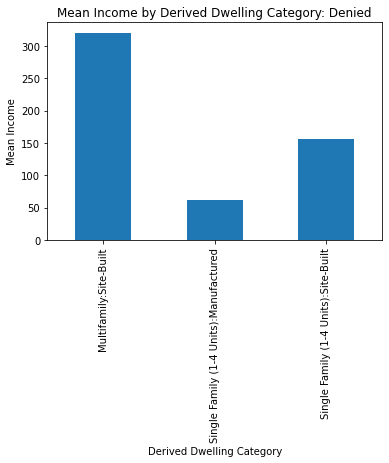

In [19]:
rejected.plot(kind='bar')
plt.xlabel('Derived Dwelling Category')
plt.ylabel('Mean Income')
plt.title('Mean Income by Derived Dwelling Category: Denied')
plt.show()


## David

## Average Income by Race

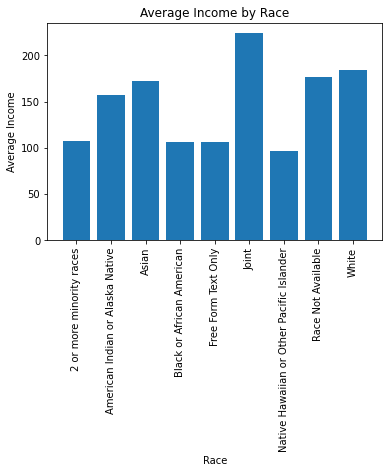

In [20]:
mean_income = df.groupby('derived_race')['income'].mean()

fig, ax = plt.subplots()
ax.bar(mean_income.index, mean_income.values)
ax.set_xlabel('Race')
ax.set_ylabel('Average Income')
ax.set_title('Average Income by Race')

plt.xticks(rotation=90)
plt.show()



## Tianyi

## Average Income by Sex

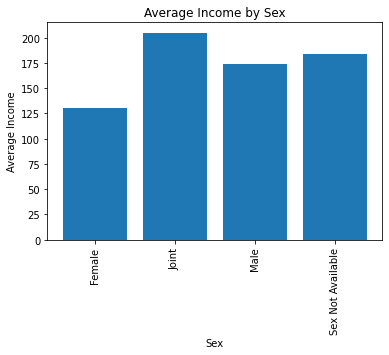

In [11]:
mean_income = df.groupby('derived_sex')['income'].mean()

fig, ax = plt.subplots()
ax.bar(mean_income.index, mean_income.values)
ax.set_xlabel('Sex')
ax.set_ylabel('Average Income')
ax.set_title('Average Income by Sex')

plt.xticks(rotation=90)
plt.show()



## Tianyi

## The percentage of loans that were rejected out of total loans for each race

<ipython-input-21-f3771fc02029>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


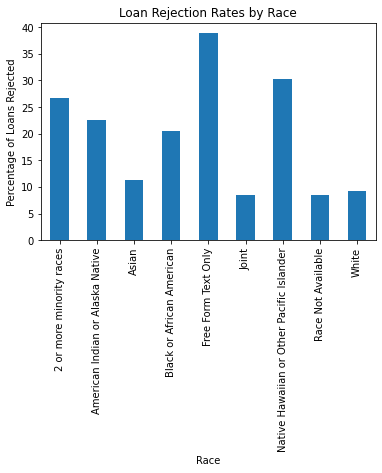

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("msamd_14454.csv")

# Calculate the percentage of rejected loans for each race
race_counts = df.groupby('derived_race')['action_taken'].value_counts(normalize=True)
race_rejection_rates = race_counts.loc[(slice(None), 3)] * 100

# Create a bar plot of the rejection rates by race
fig, ax = plt.subplots()
race_rejection_rates.plot(kind='bar', ax=ax)
ax.set_xlabel('Race')
ax.set_ylabel('Percentage of Loans Rejected')
ax.set_title('Loan Rejection Rates by Race')

plt.show()


## Song

## The percentage of loans that were rejected out of total loans for each sex

<ipython-input-24-d20213709a42>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


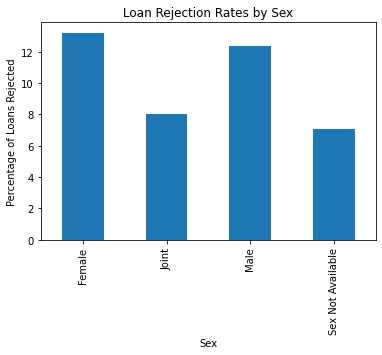

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("msamd_14454.csv")

# Calculate the percentage of rejected loans for each sex
sex_counts = df.groupby('derived_sex')['action_taken'].value_counts(normalize=True)
sex_rejection_rates = sex_counts.loc[(slice(None), 3)] * 100

# Create a bar plot of the rejection rates by sex
fig, ax = plt.subplots()
sex_rejection_rates.plot(kind='bar', ax=ax)
ax.set_xlabel('Sex')
ax.set_ylabel('Percentage of Loans Rejected')
ax.set_title('Loan Rejection Rates by Sex')

plt.show()



## Song

## The percentage of loans that were rejected out of total loans for each loan type

<ipython-input-27-3171d587b318>:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


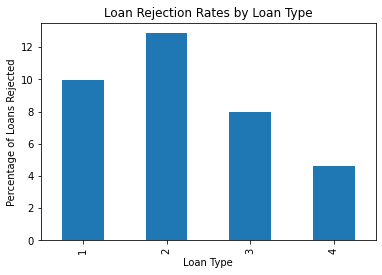

1 - Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)
2 - Federal Housing Administration insured (FHA)
3 - Veterans Affairs guaranteed (VA)
4 - USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)


In [27]:
# Load the data
df = pd.read_csv("msamd_14454.csv")

# Calculate the percentage of rejected loans for each sex
type_counts = df.groupby('loan_type')['action_taken'].value_counts(normalize=True)
type_rejection_rates = type_counts.loc[(slice(None), 3)] * 100

# Create a bar plot of the rejection rates by sex
fig, ax = plt.subplots()
type_rejection_rates.plot(kind='bar', ax=ax)
ax.set_xlabel('Loan Type')
ax.set_ylabel('Percentage of Loans Rejected')
ax.set_title('Loan Rejection Rates by Loan Type')

plt.show()

print("1 - Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)")
print("2 - Federal Housing Administration insured (FHA)")
print("3 - Veterans Affairs guaranteed (VA)")
print("4 - USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)")




## Adriana

## Most Common Reasons for Loan Rejection

<ipython-input-17-004e07747232>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


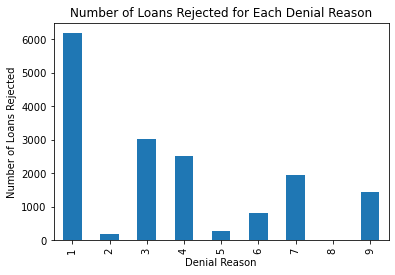

In [17]:
# Load the data
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("msamd_14454.csv")

# Calculate the percentage of rejected loans for each sex
denial = df.groupby('denial_reason-1')['denial_reason-1'].count()

denial = denial[:9]

# Create a bar plot of the rejection rates by sex
fig, ax = plt.subplots()
denial.plot(kind='bar', ax=ax)
ax.set_xlabel('Denial Reason')
ax.set_ylabel('Number of Loans Rejected')
ax.set_title('Number of Loans Rejected for Each Denial Reason')

plt.show()



## Adriana

## Extension Analysis

In [9]:
""" 
Neighborhoods with Best / Still Desirable Rating:
	Fenway
	Jamaica Plain
	Back Bay
	West Roxbury
	Newton*
	Brookline*

with Declining / Hazardous Rating:
	North End
	West End
	Roxbury
	South Boston
	Dorchester
	Longwood
	Roslindale
	Mattapan

*Newton and Brookline are not in Boston, but are within the greater Boston area and are included in the data set
"""

""" 
Creating data frame with only the columns we need in the format:
[neighborhood name, rating, white population, black/african american population, hispanic population, asian population, other population]


				White Alone		%		Black/African-American	%		Hispanic	%		Asian alone		%		Other Races		%
Fenway			18,856			56.30%	1,810					5.40%	4,022		12.00%	7,071			21.10%	1,730			5.20%
Jamaica Plain	22,533			55.10%	5,825					14.30%	9,001		22.00%	2,004			4.90%	1,504			3.70%
Back Bay		13,044			73.40%	761						4.30%	1,715		9.60%	1,917			10.80%	346				1.90%
West Roxbury	22,584			67.40%	4,094					12.20%	3,376		10.10%	2,500			7.50%	972				2.90%
Newton			64715			74.00%	2536					2.90%	3586		4.10%	13205			15.10%	3411			3.90%
Brookline		44297			70.10%	1580					2.50%	4171		6.60%	11248			17.80%	1896			3.00%
North End		7,692			87.90%	29						0.30%	614			7.00%	287				3.30%	127				1.50%
West End		4,436			67.00%	463						7.00%	838			12.70%	706				10.70%	176				2.70%
Roxbury			5,937			11.00%	27,243					50.30%	16,637		30.70%	1,905			3.50%	2,439			4.50%
South Boston	28,008			76.20%	2,064					5.60%	4,065		11.10%	2,070			5.60%	565				1.50%
Dorchester		28,244			22.30%	55,787					44.00%	25,288		19.90%	12,540			9.90%	5,050			4.00%
Longwood		3,746			70.00%	291						5.40%	389			7.30%	752				14.10%	173				3.20%
Roslindale		15,291			50.90%	5,805					19.30%	7,182		23.90%	750				2.50%	993				3.30%
Mattapan		1,612			6.00%	19,821					74.40%	3,771		14.10%	499				1.90%	956				3.60%
"""

# create new data frame with the columns: [neighborhood name, white population, black/african american population, hispanic population, asian population, other population]
df = pd.DataFrame(columns=['neighborhood', 'rating', 'white', 'white %', 'black', 'black %', 'hispanic', 'hispanic %', 'asian', 'asian %', 'other', 'other %'])

df['neighborhood'] = ['Fenway', 'Jamaica Plain', 'Back Bay', 'West Roxbury', 'Newton', 'Brookline', 'North End', 'West End', 'Roxbury', 'South Boston', 'Dorchester', 'Longwood', 'Roslindale', 'Mattapan']
df['rating'] = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
df['white'] = [18856, 22533, 13044, 22584, 64715, 44297, 7692, 4436, 5937, 28008, 28244, 3746, 15291, 1612]
df['white %'] = [56.30, 55.10, 73.40, 67.40, 74.00, 70.10, 87.90, 67.00, 11.00, 76.20, 22.30, 70.00, 50.90, 6.00]
df['black'] = [1810, 5825, 761, 4094, 2536, 1580, 29, 463, 27243, 2064, 55787, 291, 5805, 19821]
df['black %'] = [5.40, 14.30, 4.30, 12.20, 2.90, 2.50, 0.30, 7.00, 50.30, 5.60, 44.00, 5.40, 19.30, 74.40]
df['hispanic'] = [4022, 9001, 1715, 3376, 3586, 4171, 614, 838, 16637, 4065, 25288, 389, 7182, 3771]
df['hispanic %'] = [12.00, 22.00, 9.60, 10.10, 4.10, 6.60, 7.00, 12.70, 30.70, 11.10, 19.90, 7.30, 23.90, 14.10]
df['asian'] = [7071, 2004, 1917, 2500, 13205, 11248, 287, 706, 1905, 2070, 12540, 752, 750, 499]
df['asian %'] = [21.10, 4.90, 10.80, 7.50, 15.10, 17.80, 3.30, 10.70, 3.50, 5.60, 9.90, 14.10, 2.50, 1.90]
df['other'] = [1730, 1504, 346, 972, 3411, 1896, 127, 176, 2439, 565, 5050, 173, 993, 956]
df['other %'] = [5.20, 3.70, 1.90, 2.90, 3.90, 3.00, 1.50, 2.70, 4.50, 1.50, 4.00, 3.20, 3.30, 3.60]

df.head(13)

,neighborhood,rating,white,white %,black,black %,hispanic,hispanic %,asian,asian %,other,other %
0,Fenway,1,18856,56.3,1810,5.4,4022,12.0,7071,21.1,1730,5.2
1,Jamaica Plain,1,22533,55.1,5825,14.3,9001,22.0,2004,4.9,1504,3.7
2,Back Bay,1,13044,73.4,761,4.3,1715,9.6,1917,10.8,346,1.9
3,West Roxbury,1,22584,67.4,4094,12.2,3376,10.1,2500,7.5,972,2.9
4,Newton,1,64715,74.0,2536,2.9,3586,4.1,13205,15.1,3411,3.9
5,Brookline,1,44297,70.1,1580,2.5,4171,6.6,11248,17.8,1896,3.0
6,North End,0,7692,87.9,29,0.3,614,7.0,287,3.3,127,1.5
7,West End,0,4436,67.0,463,7.0,838,12.7,706,10.7,176,2.7
8,Roxbury,0,5937,11.0,27243,50.3,16637,30.7,1905,3.5,2439,4.5
9,South Boston,0,28008,76.2,2064,5.6,4065,11.1,2070,5.6,565,1.5


In [10]:
# Group the DataFrame by rating
grouped_df = df.groupby("rating")

# Compute average racial composition percentages for each rating group
average_compositions = grouped_df[["white %", "black %", "hispanic %", "asian %", "other %"]].mean()

print(average_compositions)

        white %    black %  hispanic %    asian %   other %
rating                                                     
0       48.9125  25.787500   15.837500   6.437500  3.037500
1       66.0500   6.933333   10.733333  12.866667  3.433333


## Beginning of Normalization

In [13]:
import pandas as pd

df = pd.read_csv("msamd_14454.csv")

# Group by 'derived_race' and count occurrences
race_counts = df['derived_race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

# Calculate the total number of individuals per race
total_with_race = race_counts['Count'].sum()
race_counts['Percentage'] = (race_counts['Count'] / total_with_race) * 100

race_percentage_dict = race_counts.set_index('Race')['Percentage'].to_dict()
df['Race Percentage'] = df['derived_race'].map(race_percentage_dict)

df.head()

/var/folders/pl/0qrs2c_56bd6q9jwb600j60h0000gn/T/ipykernel_9691/1519370571.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,Race Percentage
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4448,31.27,113700,91,1016,1519,72,57.277643
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,4230,7.78,113700,179,1228,1394,60,57.277643
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,7312,2.95,113700,132,2099,2345,43,57.277643
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,2380,77.98,113700,18,16,343,51,7.472391
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,5399,69.98,113700,54,568,1437,48,26.168790
